<a href="https://colab.research.google.com/github/Samar2411/Python_Paper_Airplanes/blob/main/Week_11_Image_Processing_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 11 : Image Processing Part 2**
## **Goal**
The goal of this lab is to get familiar with images and python packages to manipulate them. 

## **Tools**
We will use functions from the image processing toolkit [CV2]. We will continue with a couple of image operations.

A. Thresholding
B. Blurring 
C. Erosion
D. Dilation
E. Gradient

We will go over several types of object detection:

A. Template Matching
B. Edge Detection
C. Contour Detection

This is not an exhaustive list of image operations or object detection methods but its a start!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab import files 

# **Image Operations**

## **Thresholding**

Its a term that simply means converting an image to a binary image. We would use it if we want to isolate certain features in an aimage. 


In [ ]:
uploaded = files.upload()

Saving Prism.jpeg to Prism.jpeg


In [ ]:
prism = cv2.imread('Prism.jpeg', 0)

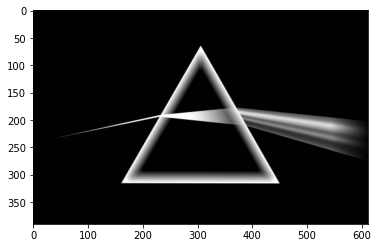

In [ ]:
plt.imshow(prism, cmap = 'gray')

The inputs are the image. The threhsold by which everything below its converted to a 0 and everything above is raised to the maximum vlaue. The third input is the maximum value. The last value is the thresholding method. There are a large number of thresholding methods and you should choose one that allows you to obtain the image features you want. 

In [ ]:
prism.max()

255

A good starting point for the threhsold is 1/2 the maximum value. 

In [ ]:
ret, thresh1 = cv2.threshold(prism ,127, 255, cv2.THRESH_BINARY)

After running the thresholding method, the image is in the second output, thresh1 in this case. 

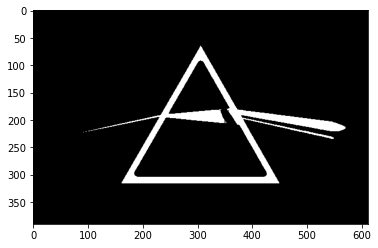

In [ ]:
plt.imshow(thresh1, cmap = 'gray')

### **Blurring Image**

Blurring does what the name of this method suggests and it blurs the image. One use of the blur method will become obvious later on because when we want to find features on the image. 

In [ ]:
uploaded = files.upload()

Saving dog.jpeg to dog.jpeg


In [ ]:
dog = cv2.imread('dog.jpeg')

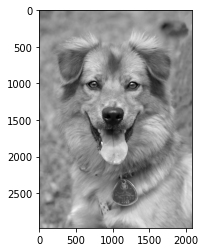

In [ ]:
plt.imshow(dog)

The inputs are the image and a variable known as kernel size. 

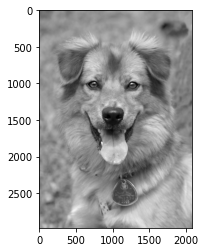

In [ ]:
blurred = cv2.blur(dog, ksize =(5,5))
plt.imshow(blurred)

Generaly speaking, increasing the kernel size increases the blurring effect.

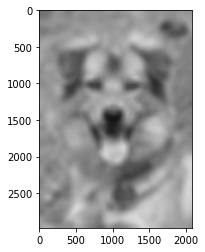

In [ ]:
blurred2 = cv2.blur(dog , ksize =(100,100))
plt.imshow(blurred2)

# Foreground vs Background

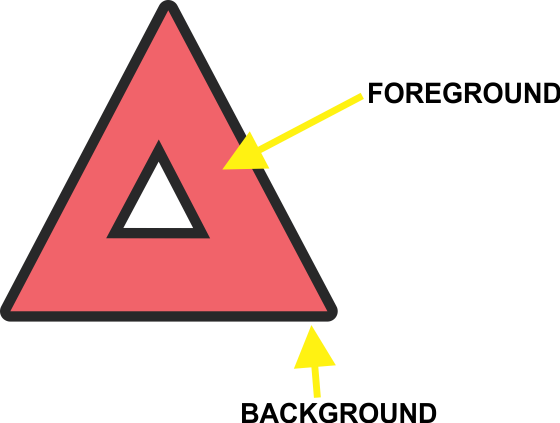

#Erosion

Generally speaking, erosion erodes away the boundaries of foreground objects. It tends to be most effective when the foreground is light color (preferrably white) and background is dark.

In [ ]:
uploaded = files.upload()

Saving Letters for Erosion.jpeg to Letters for Erosion.jpeg


In [ ]:
letters = cv2.imread('Letters for Erosion.jpeg')

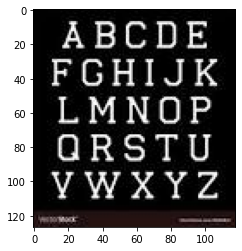

In [ ]:
plt.imshow(letters)

# First we create the kernel. A kernel is simply a matrix of numbers taht we are going to apply over the image to smooth it out. 

For the cv2 erode functions, we need to define our own kernel. Without getting too conceptual, you can copy and paste this to following cell to create a kernel. The kernels we are using today are just arrays of ones. 

In [ ]:
kernel = np.ones((2,2),np.uint8)
kernel

array([[1, 1],
       [1, 1]], dtype=uint8)

The inputs are the image, the kernel and the iterations. The iterations is how many erosions the function will perform. 

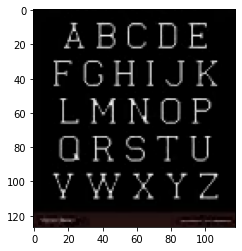

In [ ]:
eroded_letters = cv2.erode( letters , kernel, iterations = 1)
plt.imshow(eroded_letters)

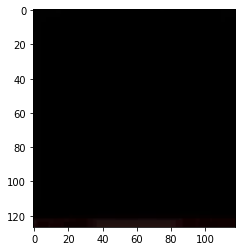

In [ ]:
eroded_letters2 = cv2.erode( letters , kernel, iterations = 5)
plt.imshow(eroded_letters2)

In [ ]:
kernel = np.ones((4,4),np.uint8)

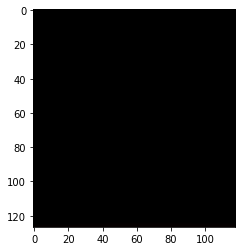

In [ ]:
eroded_letters3 = cv2.erode( letters , kernel, iterations = 5)
plt.imshow(eroded_letters3)

# Dilation

This method helps remove noise from an image with a lot of background noise. 


In [ ]:
uploaded = files.upload()

Saving Noisy Image.png to Noisy Image.png


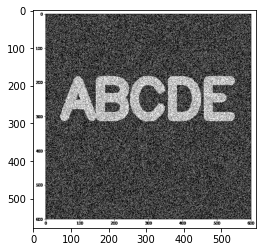

In [ ]:
noisy = cv2.imread('Noisy Image.png')
plt.imshow(noisy)

Here, we have to manually create our kernel. 

In [ ]:
kernel = np.ones((5,5),np.uint8)

Our inputs are the image, the method or MORPH_OPEN in this case and the kernel. 

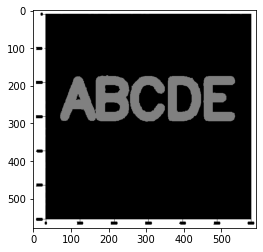

In [ ]:
open = cv2.morphologyEx(noisy, cv2.MORPH_OPEN, kernel)
plt.imshow(open)

If there is a lot of foreground noise, you can use a method. 

In [ ]:
uploaded = files.upload()

Saving Foregroud Noise.png to Foregroud Noise.png


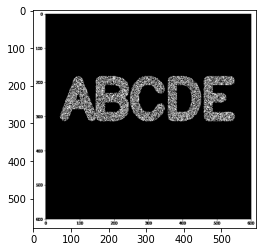

In [ ]:
fore_noisy = cv2.imread('Foregroud Noise.png')
plt.imshow(fore_noisy)

The inputs are similar to before but now you use MORPH_CLOSE.

In [ ]:
closing = cv2.morphologyEx(fore_noisy, cv2.MORPH_CLOSE, kernel)

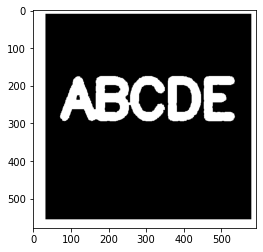

In [ ]:
plt.imshow(closing)

### **Gradients**

The term gradient means a directional change in the color intensity of an image. Generally speaking, the gradient operators show you the contours of an image in a certain direction. 

There are a ton of inputs for the Sobel operator which is how you get the gradients in a particular direction. 

If you want the vertical contours of an image, you want the x gradient and the inputs will be the image, a cv2 operator and the inputs 1,0, followed by kernel size. 

In [ ]:
uploaded = files.upload()

Saving Tile_Wall.jpeg to Tile_Wall.jpeg


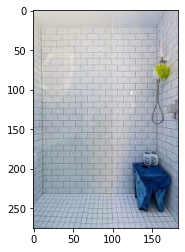

In [ ]:
tiles = cv2.imread('Tile_Wall.jpeg')
plt.imshow(tiles)

In [ ]:
sobelx = cv2.Sobel(tiles,cv2.CV_64F,1,0,ksize=5)


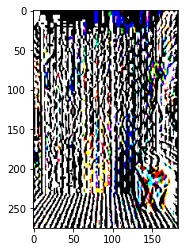

In [ ]:
plt.imshow(sobelx, cmap = 'gray')


If you want the horizontal contours of an image, you want the y gradient and the inputs will be the image, a cv2 operator and the inputs 0,1, followed by kernel size. 

In [ ]:
sobely = cv2.Sobel(tiles,cv2.CV_64F,0,1,ksize=5)


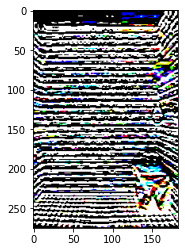

In [ ]:
plt.imshow(sobely, cmap = 'gray')


The Laplacian operator is a sort of combination of the x and y gradient and an attempt to detect all of the contours of an image. 

In [ ]:
laplacian = cv2.Laplacian(tiles,cv2.CV_64F)

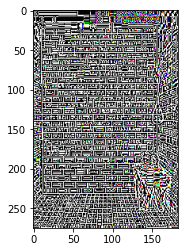

In [ ]:
plt.imshow(laplacian, cmap = 'gray')

# * Ojbect Detection Methods*

### **Template Matching**
Template Matching works by using a image you want to find and scanning the target images for an exact copy.

For many of these object detection methods, there will be many methods and the best way to find out which one works is to try them all. 

'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'

In [ ]:
uploaded = files.upload()

Saving Mount Rushmore.jpeg to Mount Rushmore (1).jpeg


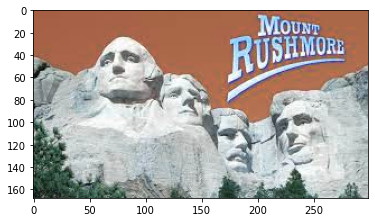

In [ ]:
Mount_Rushmore = cv2.imread('Mount Rushmore (1).jpeg')
plt.imshow(Mount_Rushmore )

In [ ]:
uploaded = files.upload()

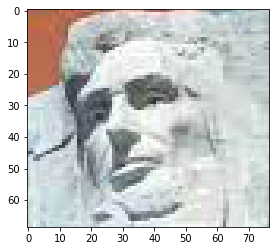

In [ ]:
Abe = cv2.imread('Old_Abe.png')
plt.imshow(Abe)

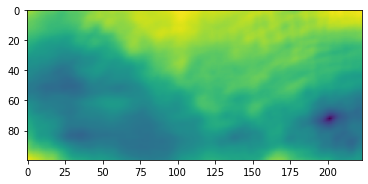

In [ ]:
res = cv2.matchTemplate(Mount_Rushmore,Abe,cv2.TM_SQDIFF)
plt.imshow(res)




To visualize whether we detected the image or not, we will just use a little bit of code to visualize the result. Feel free to copy an dpaste. 

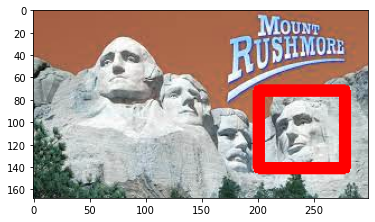

In [ ]:
height, width,channels = Abe.shape
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = min_loc  
bottom_right = (top_left[0] + width, top_left[1] + height)
cv2.rectangle(Mount_Rushmore,top_left, bottom_right, 255, 10)
plt.imshow(Mount_Rushmore)

# Edge Detection

This method functions as its name suggests, you look for edges in a picture. There are two thresholds. As a starting point, we can use the medium value. 

In [ ]:
uploaded = files.upload()

Saving Cat.jpeg to Cat.jpeg


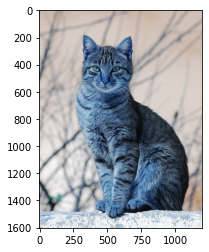

In [ ]:
Cat = cv2.imread('Cat.jpeg')
plt.imshow(Cat)

In [ ]:
edges = cv2.Canny(image=Cat, threshold1=127, threshold2=127)

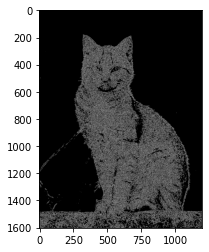

In [ ]:
plt.imshow(edges, cmap = 'gray')

Sometimes edge detection works better with a bit of blurring beforehand. 

In [ ]:
blurred_img = cv2.blur(Cat,ksize=(7,7))

In [ ]:
edges = cv2.Canny(image=blurred_img, threshold1=127 , threshold2=127)

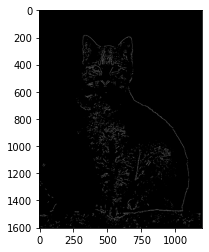

In [ ]:
plt.imshow(edges,cmap = 'gray')

# Contour Detection

The inputs are the image first. The second specifiies if you want the external or internal contours. RETR_CCOMP gives us both. The third input is the method it uses to get the contours. 

If you want to go one step further from edge detection, we can try to find the contours of images. The second output of find contours is a list of contours. The outupt of hierarchy is the whether it is internal of external. 

In [ ]:
uploaded = files.upload()

Saving Snowflake.jpeg to Snowflake.jpeg


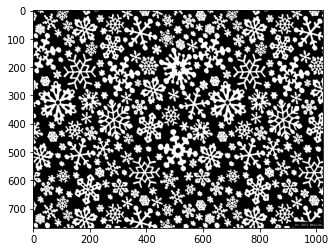

In [ ]:
Snow = cv2.imread('Snowflake.jpeg',0)
plt.imshow(Snow, cmap = 'gray')

In [ ]:
contours, hierarchy = cv2.findContours(Snow, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

The following code allows us to visualize the contours. Its a very copy and paste affair. ss

In [ ]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(Snow.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

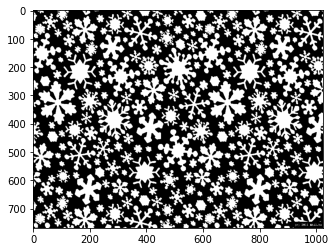

In [ ]:
plt.imshow(external_contours,cmap='gray')

In [ ]:
# Create empty array to hold internal contours
internal_contours = np.zeros(Snow.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(internal_contours, contours, i, 255, -1)

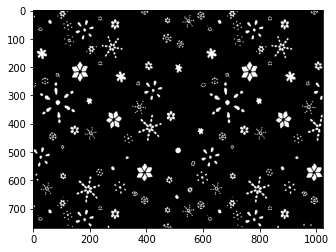

In [ ]:
plt.imshow(internal_contours,cmap='gray')